In [119]:
import sys,os, glob
import shutil

import numpy as np

import matplotlib as plt
plt.rcParams['pdf.fonttype'] = 42

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import seaborn as sns

from Bio import SeqIO, SeqRecord
from Bio.Seq import Seq
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIWWW

import fuzzysearch
import re
from collections import Counter, OrderedDict

from fuzzysearch import find_near_matches

In [6]:
run = '../rnaseq'

os.chdir(run)

In [7]:
print ("="*60)
for file in glob.glob("ms*"):
    os.chdir(file)
    r1 = glob.glob("*R1_001*")[0]
    print (r1)

    print ("\ntrimming files\n")
    cmd = "sickle se -f {0} -t sanger \
            -o trimmed_R1.fastq".format(r1)
    os.system(cmd)
    print ("="*60)

    os.chdir(run)
        
os.chdir(run)

msDMP_02_105_S105_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 8839863
FastQ records discarded: 2460

msDMP_02_97_S97_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 6402370
FastQ records discarded: 2586

msDMP_02_102_S102_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 6404668
FastQ records discarded: 2475

msDMP_02_99_S99_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 4379297
FastQ records discarded: 2085

msDMP_02_101_S101_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 7183489
FastQ records discarded: 2991

msDMP_02_103_S103_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 5495380
FastQ records discarded: 2303

msDMP_02_98_S98_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 7644383
FastQ records discarded: 3132

msDMP_02_107_S107_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 6985225
FastQ records discarded: 3069

msDMP_02_100_S100_L001_R1_001.fastq.gz

trimming files


FastQ records kept: 6

### Generate index for E coli BW25113 genome

In [7]:
!bowtie2-build GCF_000750555.1_ASM75055v1_genomic.fna bw_indx

dyld[41229]: Library not loaded: @rpath/libtbb.dylib
  Referenced from: <8C375222-FC55-3F4B-BAC0-FB5F0B9DE0E7> /Users/slopez/opt/anaconda3/bin/bowtie2-build-s
  Reason: tried: '/Users/slopez/opt/anaconda3/bin/../lib/libtbb.dylib' (no such file), '/Users/slopez/opt/anaconda3/bin/../lib/libtbb.dylib' (no such file), '/usr/local/lib/libtbb.dylib' (no such file), '/usr/lib/libtbb.dylib' (no such file, not in dyld cache)


### align reads

In [54]:
os.chdir(run)
for file in glob.glob("ms*"):
    os.chdir(file)
    r1 = 'trimmed_R1.fastq'

    print ("aligning reads\n")
    
    cmd = "bowtie2 -p 11 --sensitive-local -x ../bw_indx -U {0} -S {1}.sam".format(r1, file)
    print (cmd)
    os.system(cmd)
    print ("="*60)

    os.chdir(run)
        
os.chdir(run)

aligning reads

bowtie2 -p 11 --sensitive-local -x ../bw_indx -U trimmed_R1.fastq -S msDMP_02_105-409504282.sam


8839863 reads; of these:
  8839863 (100.00%) were unpaired; of these:
    191852 (2.17%) aligned 0 times
    1977572 (22.37%) aligned exactly 1 time
    6670439 (75.46%) aligned >1 times
97.83% overall alignment rate


aligning reads

bowtie2 -p 11 --sensitive-local -x ../bw_indx -U trimmed_R1.fastq -S msDMP_02_97-409504274.sam


6402370 reads; of these:
  6402370 (100.00%) were unpaired; of these:
    156930 (2.45%) aligned 0 times
    5847009 (91.33%) aligned exactly 1 time
    398431 (6.22%) aligned >1 times
97.55% overall alignment rate


aligning reads

bowtie2 -p 11 --sensitive-local -x ../bw_indx -U trimmed_R1.fastq -S msDMP_02_102-409504279.sam


6404668 reads; of these:
  6404668 (100.00%) were unpaired; of these:
    583475 (9.11%) aligned 0 times
    5425215 (84.71%) aligned exactly 1 time
    395978 (6.18%) aligned >1 times
90.89% overall alignment rate


aligning reads

bowtie2 -p 11 --sensitive-local -x ../bw_indx -U trimmed_R1.fastq -S msDMP_02_99-409504276.sam


4379297 reads; of these:
  4379297 (100.00%) were unpaired; of these:
    95812 (2.19%) aligned 0 times
    3935937 (89.88%) aligned exactly 1 time
    347548 (7.94%) aligned >1 times
97.81% overall alignment rate


aligning reads

bowtie2 -p 11 --sensitive-local -x ../bw_indx -U trimmed_R1.fastq -S msDMP_02_101-409504278.sam


7183489 reads; of these:
  7183489 (100.00%) were unpaired; of these:
    623302 (8.68%) aligned 0 times
    6091115 (84.79%) aligned exactly 1 time
    469072 (6.53%) aligned >1 times
91.32% overall alignment rate


aligning reads

bowtie2 -p 11 --sensitive-local -x ../bw_indx -U trimmed_R1.fastq -S msDMP_02_103-409504280.sam


5495380 reads; of these:
  5495380 (100.00%) were unpaired; of these:
    112446 (2.05%) aligned 0 times
    4972635 (90.49%) aligned exactly 1 time
    410299 (7.47%) aligned >1 times
97.95% overall alignment rate


aligning reads

bowtie2 -p 11 --sensitive-local -x ../bw_indx -U trimmed_R1.fastq -S msDMP_02_98-409504275.sam


7644383 reads; of these:
  7644383 (100.00%) were unpaired; of these:
    154191 (2.02%) aligned 0 times
    6948498 (90.90%) aligned exactly 1 time
    541694 (7.09%) aligned >1 times
97.98% overall alignment rate


aligning reads

bowtie2 -p 11 --sensitive-local -x ../bw_indx -U trimmed_R1.fastq -S msDMP_02_107-409504284.sam


6985225 reads; of these:
  6985225 (100.00%) were unpaired; of these:
    482088 (6.90%) aligned 0 times
    5955793 (85.26%) aligned exactly 1 time
    547344 (7.84%) aligned >1 times
93.10% overall alignment rate


aligning reads

bowtie2 -p 11 --sensitive-local -x ../bw_indx -U trimmed_R1.fastq -S msDMP_02_100-409504277.sam


6174418 reads; of these:
  6174418 (100.00%) were unpaired; of these:
    537321 (8.70%) aligned 0 times
    5188181 (84.03%) aligned exactly 1 time
    448916 (7.27%) aligned >1 times
91.30% overall alignment rate


aligning reads

bowtie2 -p 11 --sensitive-local -x ../bw_indx -U trimmed_R1.fastq -S msDMP_02_104-409504281.sam


5078744 reads; of these:
  5078744 (100.00%) were unpaired; of these:
    107215 (2.11%) aligned 0 times
    4545682 (89.50%) aligned exactly 1 time
    425847 (8.38%) aligned >1 times
97.89% overall alignment rate


aligning reads

bowtie2 -p 11 --sensitive-local -x ../bw_indx -U trimmed_R1.fastq -S msDMP_02_106-409504283.sam


6289338 reads; of these:
  6289338 (100.00%) were unpaired; of these:
    472983 (7.52%) aligned 0 times
    5089109 (80.92%) aligned exactly 1 time
    727246 (11.56%) aligned >1 times
92.48% overall alignment rate


### convert SAM to mapped and unmapped BAM

In [55]:
print ("="*60)
for file in glob.glob("ms*"):
    os.chdir(file)
    r1 = glob.glob("*.sam")[0]

    print ("converting SAM > mapped BAM \n")
    
    cmd = "samtools view -b -F 4 {0} > {1}_mapped.bam".format(r1, file)
    print (cmd)
    os.system(cmd)

    print ("\n converting SAM > unmapped BAM \n")

    cmd = "samtools view -b -f 4 {0} > {1}_unmapped.bam".format(r1, file)
    print (cmd)
    os.system(cmd)
    
    print ('')
    print ("="*60)

    os.chdir(run)
        
os.chdir(run)

converting SAM > mapped BAM 

samtools view -b -F 4 msDMP_02_105-409504282.sam > msDMP_02_105-409504282_mapped.bam

 converting SAM > unmapped BAM 

samtools view -b -f 4 msDMP_02_105-409504282.sam > msDMP_02_105-409504282_unmapped.bam

converting SAM > mapped BAM 

samtools view -b -F 4 msDMP_02_97-409504274.sam > msDMP_02_97-409504274_mapped.bam

 converting SAM > unmapped BAM 

samtools view -b -f 4 msDMP_02_97-409504274.sam > msDMP_02_97-409504274_unmapped.bam

converting SAM > mapped BAM 

samtools view -b -F 4 msDMP_02_102-409504279.sam > msDMP_02_102-409504279_mapped.bam

 converting SAM > unmapped BAM 

samtools view -b -f 4 msDMP_02_102-409504279.sam > msDMP_02_102-409504279_unmapped.bam

converting SAM > mapped BAM 

samtools view -b -F 4 msDMP_02_99-409504276.sam > msDMP_02_99-409504276_mapped.bam

 converting SAM > unmapped BAM 

samtools view -b -f 4 msDMP_02_99-409504276.sam > msDMP_02_99-409504276_unmapped.bam

converting SAM > mapped BAM 

samtools view -b -F 4 msDMP_02

### sort BAM files

In [56]:
for file in glob.glob("ms*"):
    os.chdir(file)
    r1 = glob.glob("*_mapped.bam")[0]

    print ("sorting BAM \n")
    
    cmd = "samtools sort {0} -o {1}_mapped_sorted.bam".format(r1, file)
    print (cmd)
    os.system(cmd)
    print ("="*60)

    os.chdir(run)
        
os.chdir(run)

sorting BAM 

samtools sort msDMP_02_105-409504282_mapped.bam -o msDMP_02_105-409504282_mapped_sorted.bam


[bam_sort_core] merging from 5 files and 1 in-memory blocks...


sorting BAM 

samtools sort msDMP_02_97-409504274_mapped.bam -o msDMP_02_97-409504274_mapped_sorted.bam


[bam_sort_core] merging from 4 files and 1 in-memory blocks...


sorting BAM 

samtools sort msDMP_02_102-409504279_mapped.bam -o msDMP_02_102-409504279_mapped_sorted.bam


[bam_sort_core] merging from 3 files and 1 in-memory blocks...


sorting BAM 

samtools sort msDMP_02_99-409504276_mapped.bam -o msDMP_02_99-409504276_mapped_sorted.bam


[bam_sort_core] merging from 2 files and 1 in-memory blocks...


sorting BAM 

samtools sort msDMP_02_101-409504278_mapped.bam -o msDMP_02_101-409504278_mapped_sorted.bam


[bam_sort_core] merging from 4 files and 1 in-memory blocks...


sorting BAM 

samtools sort msDMP_02_103-409504280_mapped.bam -o msDMP_02_103-409504280_mapped_sorted.bam


[bam_sort_core] merging from 3 files and 1 in-memory blocks...


sorting BAM 

samtools sort msDMP_02_98-409504275_mapped.bam -o msDMP_02_98-409504275_mapped_sorted.bam


[bam_sort_core] merging from 4 files and 1 in-memory blocks...


sorting BAM 

samtools sort msDMP_02_107-409504284_mapped.bam -o msDMP_02_107-409504284_mapped_sorted.bam


[bam_sort_core] merging from 4 files and 1 in-memory blocks...


sorting BAM 

samtools sort msDMP_02_100-409504277_mapped.bam -o msDMP_02_100-409504277_mapped_sorted.bam


[bam_sort_core] merging from 3 files and 1 in-memory blocks...


sorting BAM 

samtools sort msDMP_02_104-409504281_mapped.bam -o msDMP_02_104-409504281_mapped_sorted.bam


[bam_sort_core] merging from 2 files and 1 in-memory blocks...


sorting BAM 

samtools sort msDMP_02_106-409504283_mapped.bam -o msDMP_02_106-409504283_mapped_sorted.bam


[bam_sort_core] merging from 3 files and 1 in-memory blocks...


### index BAM files

In [57]:
for file in glob.glob("ms*"):
    os.chdir(file)
    r1 = glob.glob("*_mapped_sorted.bam")[0]

    print ("indexing BAM \n")
    cmd = "samtools index {0}".format(r1)
    print (cmd)
    os.system(cmd)
    print ("="*60)

    os.chdir(run)
        
os.chdir(run)

indexing BAM 

samtools index msDMP_02_105-409504282_mapped_sorted.bam
indexing BAM 

samtools index msDMP_02_97-409504274_mapped_sorted.bam
indexing BAM 

samtools index msDMP_02_102-409504279_mapped_sorted.bam
indexing BAM 

samtools index msDMP_02_99-409504276_mapped_sorted.bam
indexing BAM 

samtools index msDMP_02_101-409504278_mapped_sorted.bam
indexing BAM 

samtools index msDMP_02_103-409504280_mapped_sorted.bam
indexing BAM 

samtools index msDMP_02_98-409504275_mapped_sorted.bam
indexing BAM 

samtools index msDMP_02_107-409504284_mapped_sorted.bam
indexing BAM 

samtools index msDMP_02_100-409504277_mapped_sorted.bam
indexing BAM 

samtools index msDMP_02_104-409504281_mapped_sorted.bam
indexing BAM 

samtools index msDMP_02_106-409504283_mapped_sorted.bam


In [59]:
mkdir analysis

### move `*mapped_sorted.bam*` to `../analysis`


In [60]:

for file in glob.glob("ms*"):
    os.chdir(file)
    
    cmd = "mv *mapped_sorted.bam* ../analysis"
    print (cmd)
    os.system(cmd)
    print ("="*60)

    os.chdir(run)
        
os.chdir(run)

mv *mapped_sorted.bam* ../analysis
mv *mapped_sorted.bam* ../analysis
mv *mapped_sorted.bam* ../analysis
mv *mapped_sorted.bam* ../analysis
mv *mapped_sorted.bam* ../analysis
mv *mapped_sorted.bam* ../analysis
mv *mapped_sorted.bam* ../analysis
mv *mapped_sorted.bam* ../analysis
mv *mapped_sorted.bam* ../analysis
mv *mapped_sorted.bam* ../analysis
mv *mapped_sorted.bam* ../analysis


In [19]:
print ("="*60)
print ("generating count tables with featureCounts")

cmd = "featureCounts -a genomic.gtf -t gene -g gene_id -o counts_genes.txt analysis/*mapped_sorted.bam"
print (cmd)
os.system(cmd)
print ("="*60)

generating count tables with featureCounts
featureCounts -a genomic.gtf -t gene -g gene_id -o counts_genes.txt analysis/*mapped_sorted.bam



        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 11 BAM files                                     ||
||                                                                            ||
||                           msDMP_02_100-409504277_mapped_sorted.bam         ||
||                           msDMP_02_101-409504278_mapped_sorted.bam         ||
||                           msDMP_02_102-409504279_mapped_sorted

||    Single-end reads are included.                                          ||
||    Total alignments : 4283485                                              ||
||    Successfully assigned alignments : 3674085 (85.8%)                      ||
||    Running time : 0.12 minutes                                             ||
||                                                                            ||
|| Write the final count table.                                               ||
|| Write the read assignment summary.                                         ||
||                                                                            ||
|| Summary of counting results can be found in file "counts_genes.txt.summar  ||
|| y"                                                                         ||
||                                                                            ||
\\============================================================================//



### run deseq2 on counts generated ^^^ 

In [16]:
import os
import pickle as pkl

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

In [17]:
import pydeseq2

In [18]:
pydeseq2.__version__

'0.4.4'

In [20]:
counts_df = pd.read_csv('counts_genes.txt', sep = '\t', skiprows = 1)
counts_df = counts_df[['Geneid', 'analysis/msDMP_02_100-409504277_mapped_sorted.bam',
                       'analysis/msDMP_02_101-409504278_mapped_sorted.bam', 'analysis/msDMP_02_102-409504279_mapped_sorted.bam',
                       'analysis/msDMP_02_103-409504280_mapped_sorted.bam', 'analysis/msDMP_02_104-409504281_mapped_sorted.bam',
                       'analysis/msDMP_02_105-409504282_mapped_sorted.bam', 'analysis/msDMP_02_106-409504283_mapped_sorted.bam',
                       'analysis/msDMP_02_107-409504284_mapped_sorted.bam', 'analysis/msDMP_02_97-409504274_mapped_sorted.bam',
                       'analysis/msDMP_02_98-409504275_mapped_sorted.bam', 'analysis/msDMP_02_99-409504276_mapped_sorted.bam']]

counts_df.set_index('Geneid')

analysis/msDMP_02_100-409504277_mapped_sorted.bam  \
Geneid                                                               
BW25113_RS00005                                                123   
BW25113_RS00010                                                511   
BW25113_RS00015                                                143   
BW25113_RS00020                                                195   
BW25113_RS00030                                                 48   
...                                                            ...   
BW25113_RS22915                                                130   
BW25113_RS22920                                                 45   
BW25113_RS22925                                                949   
BW25113_RS22930                                                423   
BW25113_RS22935                                                102   

                 analysis/msDMP_02_101-409504278_mapped_sorted.bam  \
Geneid                                                               
BW25113_RS00005                                                 86   
BW25113_RS00010                                                719   
BW25113_RS00015                                                237   
BW25113_RS00020                                                278   
BW25113_RS00030                                                 46   
...                                                            ...   
BW25113_RS22915                                                127   
BW25113_RS22920                                                 48   
BW25113_RS22925                                               1057   
BW25113_RS22930                                                553   
BW25113_RS22935                                                 92   

                 analysis/msDMP_02_102-409504279_mapped_sorted.bam  \
Geneid                                                               
BW25113_RS00005                                                 72   
BW25113_RS00010                                                660   
BW25113_RS00015                                                206   
BW25113_RS00020                                                271   
BW25113_RS00030                                                 39   
...                                                            ...   
BW25113_RS22915                                                134   
BW25113_RS22920                                                 45   
BW25113_RS22925                                               1046   
BW25113_RS22930                                                393   
BW25113_RS22935                                                 84   

                 analysis/msDMP_02_103-409504280_mapped_sorted.bam  \
Geneid                                                               
BW25113_RS00005                                                174   
BW25113_RS00010                                                465   
BW25113_RS00015                                                191   
BW25113_RS00020                                                287   
BW25113_RS00030                                                 27   
...                                                            ...   
BW25113_RS22915                                                121   
BW25113_RS22920                                                 43   
BW25113_RS22925                                                865   
BW25113_RS22930                                                440   
BW25113_RS22935                                                 43   

                 analysis/msDMP_02_104-409504281_mapped_sorted.bam  \
Geneid                                                               
BW25113_RS00005                                                116   
BW25113_RS00010                                                450   
BW25113_RS00015                                                193   
BW25113_RS00020        

In [21]:
counts_df = counts_df.T
new_header = counts_df.iloc[0] #grab the first row for the header
counts_df = counts_df[1:] #take the data less the header row
counts_df.columns = new_header #set the header row as the df header
metadata = pd.read_csv('metadata.csv', index_col = 0)

In [22]:
counts_df

Geneid                                            BW25113_RS00005  \
analysis/msDMP_02_100-409504277_mapped_sorted.bam             123   
analysis/msDMP_02_101-409504278_mapped_sorted.bam              86   
analysis/msDMP_02_102-409504279_mapped_sorted.bam              72   
analysis/msDMP_02_103-409504280_mapped_sorted.bam             174   
analysis/msDMP_02_104-409504281_mapped_sorted.bam             116   
analysis/msDMP_02_105-409504282_mapped_sorted.bam               6   
analysis/msDMP_02_106-409504283_mapped_sorted.bam              58   
analysis/msDMP_02_107-409504284_mapped_sorted.bam             119   
analysis/msDMP_02_97-409504274_mapped_sorted.bam               36   
analysis/msDMP_02_98-409504275_mapped_sorted.bam               59   
analysis/msDMP_02_99-409504276_mapped_sorted.bam               63   

Geneid                                            BW25113_RS00010  \
analysis/msDMP_02_100-409504277_mapped_sorted.bam             511   
analysis/msDMP_02_101-409504278_mapped_sorted.bam             719   
analysis/msDMP_02_102-409504279_mapped_sorted.bam             660   
analysis/msDMP_02_103-409504280_mapped_sorted.bam             465   
analysis/msDMP_02_104-409504281_mapped_sorted.bam             450   
analysis/msDMP_02_105-409504282_mapped_sorted.bam             170   
analysis/msDMP_02_106-409504283_mapped_sorted.bam             455   
analysis/msDMP_02_107-409504284_mapped_sorted.bam             508   
analysis/msDMP_02_97-409504274_mapped_sorted.bam              487   
analysis/msDMP_02_98-409504275_mapped_sorted.bam              567   
analysis/msDMP_02_99-409504276_mapped_sorted.bam              291   

Geneid                                            BW25113_RS00015  \
analysis/msDMP_02_100-409504277_mapped_sorted.bam             143   
analysis/msDMP_02_101-409504278_mapped_sorted.bam             237   
analysis/msDMP_02_102-409504279_mapped_sorted.bam             206   
analysis/msDMP_02_103-409504280_mapped_sorted.bam             191   
analysis/msDMP_02_104-409504281_mapped_sorted.bam             193   
analysis/msDMP_02_105-409504282_mapped_sorted.bam              70   
analysis/msDMP_02_106-409504283_mapped_sorted.bam             137   
analysis/msDMP_02_107-409504284_mapped_sorted.bam             165   
analysis/msDMP_02_97-409504274_mapped_sorted.bam              192   
analysis/msDMP_02_98-409504275_mapped_sorted.bam              177   
analysis/msDMP_02_99-409504276_mapped_sorted.bam              104   

Geneid                                            BW25113_RS00020  \
analysis/msDMP_02_100-409504277_mapped_sorted.bam             195   
analysis/msDMP_02_101-409504278_mapped_sorted.bam             278   
analysis/msDMP_02_102-409504279_mapped_sorted.bam             271   
analysis/msDMP_02_103-409504280_mapped_sorted.bam             287   
analysis/msDMP_02_104-409504281_mapped_sorted.bam             250   
analysis/msDMP_02_105-409504282_mapped_sorted.bam             102   
analysis/msDMP_02_106-409504283_mapped_sorted.bam             146   
analysis/msDMP_02_107-409504284_mapped_sorted.bam             267   
analysis/msDMP_02_97-409504274_mapped_sorted.bam              177   
analysis/msDMP_02_98-409504275_mapped_sorted.bam              240   
analysis/msDMP_02_99-409504276_mapped_sorted.bam              129   

Geneid                                            BW25113_RS00030  \
analysis/msDMP_02_100-409504277_mapped_sorted.bam              48   
analysis/msDMP_02_101-409504278_mapped_sorted.bam              46   
analysis/msDMP_02_102-409504279_mapped_sorted.bam              39   
analysis/msDMP_02_103-409504280_mapped_sorted.bam              27   
analysis/msDMP_02_104-409504281_mapped_sorted.bam              35   
analysis/msDMP_02_105-409504282_mapped_sorted.bam              27   
analysis/msDMP_02_106-409504283_mapped_sorted.bam              38   
analysis/msDMP_02_107-409504284_mapped_sorted.bam              51   
analysis/msDMP_02_97-409504274_mapped_sorted.bam               

In [24]:
metadata_filtered = metadata[metadata['lambda']=='no']
counts_df_filtered = counts_df.loc[metadata_filtered.index]

In [29]:
## to filter out genes that have less than 10 read counts in total
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]

In [30]:
counts_df_filtered = counts_df_filtered[genes_to_keep]

### Read counts modeling with the DeseqDataSet class
#### We start by creating a DeseqDataSet object from the count and metadata data. A DeseqDataSet fits dispersion and log-fold change (LFC) parameters from the data, and stores them.



In [31]:
inference = DefaultInference(n_cpus=11)
dds = DeseqDataSet(
    counts=counts_df_filtered,
    metadata=metadata_filtered,
    design_factors="Genotype",
    refit_cooks=True,
    inference=inference,
    # n_cpus=8, # n_cpus can be specified here or in the inference object
)

In [32]:
dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.12 seconds.

Fitting dispersion trend curve...
... done in 0.26 seconds.

Fitting MAP dispersions...
... done in 1.09 seconds.

Fitting LFCs...
... done in 0.83 seconds.

Refitting 0 outliers.



In [33]:
dds

AnnData object with n_obs × n_vars = 6 × 4426
    obs: 'Genotype', 'lambda'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

X stores the count data,      
obs stores design factors,      
obsm stores sample-level data, such as "design_matrix" and "size_factors",      
varm stores gene-level data, such as "dispersions" and "LFC".      

In [34]:
stat_res = DeseqStats(dds, inference=inference)

In [35]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Genotype sspa vs BW25113
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Geneid                                                                      
BW25113_RS00005   68.178006        0.975136  0.944015  1.032967  0.301619   
BW25113_RS00010  374.975639        0.116474  0.174257  0.668404  0.503875   
BW25113_RS00015  145.172763        0.358319  0.215488  1.662827  0.096347   
BW25113_RS00020  188.561955        0.647374  0.195211  3.316272  0.000912   
BW25113_RS00030   28.273200        0.863299  0.402904  2.142691  0.032138   
...                     ...             ...       ...       ...       ...   
BW25113_RS22915   98.447000        0.105091  0.246816  0.425786  0.670264   
BW25113_RS22920   32.956801        0.071128  0.333034  0.213575  0.830878   
BW25113_RS22925  795.951734        0.024341  0.196656  0.123773  0.901495   
BW25113_RS22930  443.117676        0.411561  0.262906  1.565429  0.117482   
BW25113_RS229

... done in 0.48 seconds.



In [36]:
res = stat_res.results_df

In [37]:
res = res.reset_index().rename(columns={'Geneid': 'gene_id'})

In [78]:
from gtfparse import read_gtf

df_gtf = read_gtf("genomic.gtf", result_type='pandas')
df_gtf = df_gtf[df_gtf['feature']=='CDS']

INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gbkey', 'gene', 'gene_biotype', 'locus_tag', 'old_locus_tag', 'inference', 'product', 'protein_id', 'transl_table', 'exon_number', 'Ontology_term', 'go_function', 'go_process', 'go_component', 'partial', 'pseudo', 'note', 'missing', 'exception', 'gene_synonym', 'internal', 'db_xref', 'transcript_biotype', 'anticodon', 'transl_except', 'promotes', 'forms', 'ends', 'misfolded']


In [82]:
df_gtf_sub = df_gtf[['gene_id', 'gene', 'product', 'Ontology_term']]
df_gtf_sub

gene_id  gene        product  \
1      BW25113_RS00005  thrL            thr   
5      BW25113_RS00010  thrA   bifunctional   
9      BW25113_RS00015  thrB     homoserine   
13     BW25113_RS00020  thrC      threonine   
17     BW25113_RS00030  yaaX        DUF2502   
...                ...   ...            ...   
17808  BW25113_RS22915  creC  two-component   
17812  BW25113_RS22920  creD           cell   
17816  BW25113_RS22925  arcA  two-component   
17820  BW25113_RS22930  yjjY        protein   
17824  BW25113_RS22935  yjtD      tRNA/rRNA   

                                           Ontology_term  
1                                                         
5      GO:0008652,GO:0009067,GO:0004072,GO:0004412,GO...  
9                                  GO:0009088,GO:0004413  
13                                 GO:0009088,GO:0004795  
17                                                        
...                                                  ...  
17808        GO:0007165,GO:0016310,GO:0000155,GO:0016020  
17812                                                     
17816                                                     
17820                                                     
17824                                                     

[4418 rows x 4 columns]

In [84]:
df_annot = res.merge(df_gtf_sub[['gene_id', 'gene', 'product', 'Ontology_term']], on = 'gene_id')#.drop(['Geneid', 'gene_id'], axis = 1)
df_annot

gene_id    baseMean  log2FoldChange     lfcSE      stat  \
0     BW25113_RS00005   68.178006        0.975136  0.944015  1.032967   
1     BW25113_RS00010  374.975639        0.116474  0.174257  0.668404   
2     BW25113_RS00015  145.172763        0.358319  0.215488  1.662827   
3     BW25113_RS00020  188.561955        0.647374  0.195211  3.316272   
4     BW25113_RS00030   28.273200        0.863299  0.402904  2.142691   
...               ...         ...             ...       ...       ...   
4320  BW25113_RS22915   98.447000        0.105091  0.246816  0.425786   
4321  BW25113_RS22920   32.956801        0.071128  0.333034  0.213575   
4322  BW25113_RS22925  795.951734        0.024341  0.196656  0.123773   
4323  BW25113_RS22930  443.117676        0.411561  0.262906  1.565429   
4324  BW25113_RS22935   59.001254       -0.563515  0.311004 -1.811922   

        pvalue      padj  gene        product  \
0     0.301619  0.498115  thrL            thr   
1     0.503875  0.682481  thrA   bifunctional   
2     0.096347  0.225720  thrB     homoserine   
3     0.000912  0.005551  thrC      threonine   
4     0.032138  0.098652  yaaX        DUF2502   
...        ...       ...   ...            ...   
4320  0.670264  0.809104  creC  two-component   
4321  0.830878  0.907373  creD           cell   
4322  0.901495  0.949311  arcA  two-component   
4323  0.117482  0.261400  yjjY        protein   
4324  0.069998  0.176204  yjtD      tRNA/rRNA   

                                          Ontology_term  
0                                                        
1     GO:0008652,GO:0009067,GO:0004072,GO:0004412,GO...  
2                                 GO:0009088,GO:0004413  
3                                 GO:0009088,GO:0004795  
4                                                        
...                                                 ...  
4320        GO:0007165,GO:0016310,GO:0000155,GO:0016020  
4321                                                     
4322                                                     
4323                                                     
4324                                                     

[4325 rows x 10 columns]

In [85]:
df_annot.sort_values('padj').head(60)

gene_id      baseMean  log2FoldChange     lfcSE       stat  \
1913  BW25113_RS10065  19000.027411        3.155492  0.161520  19.536199   
3072  BW25113_RS16205    468.093367        4.045009  0.235444  17.180338   
3464  BW25113_RS18270    502.786120        2.924001  0.176137  16.600752   
1186  BW25113_RS06245    225.214840       -5.023206  0.330808 -15.184657   
1068  BW25113_RS05635    892.525347        2.519633  0.167237  15.066198   
1881  BW25113_RS09890    703.242857        2.394039  0.160427  14.922960   
3448  BW25113_RS18190    318.934610       -3.200602  0.220830 -14.493510   
1912  BW25113_RS10060    196.409201        2.898033  0.211884  13.677419   
3177  BW25113_RS16740   1329.880232       -3.211873  0.235343 -13.647620   
1882  BW25113_RS09895   1176.236864        2.165023  0.159091  13.608695   
4276  BW25113_RS22675   3492.106190        2.059964  0.153612  13.410177   
1879  BW25113_RS09880    889.043198        2.114132  0.157893  13.389614   
1883  BW25113_RS09900    623.738388        2.257023  0.181644  12.425539   
1069  BW25113_RS05640    480.645170        2.407970  0.197615  12.185160   
1884  BW25113_RS09905    700.048497        2.174518  0.179611  12.106799   
3186  BW25113_RS16785    529.406034        1.995974  0.166931  11.956896   
1184  BW25113_RS06235    187.586884       -3.070337  0.264710 -11.598886   
3463  BW25113_RS18265    254.101409        2.184855  0.189928  11.503590   
1922  BW25113_RS10110    132.625024       -3.163910  0.277313 -11.409169   
1880  BW25113_RS09885    981.296994        2.196865  0.194076  11.319588   
1185  BW25113_RS06240    103.851144       -4.729044  0.421271 -11.225659   
3590  BW25113_RS18930    451.710734        1.904371  0.171662  11.093753   
1062  BW25113_RS05605     85.281937        3.262415  0.298043  10.946109   
1875  BW25113_RS09860    549.538932        2.058924  0.191226  10.766970   
886   BW25113_RS04660    846.864657       -2.204905  0.204942 -10.758698   
4277  BW25113_RS22680    298.238848        1.955078  0.183601  10.648507   
918   BW25113_RS04825   4300.810934       -1.621927  0.155292 -10.444352   
1876  BW25113_RS09865    670.565302        2.483687  0.244570  10.155318   
1732  BW25113_RS09115    116.419536        2.419106  0.238716  10.133827   
2762  BW25113_RS14545   2838.195367        1.785052  0.182170   9.798800   
1191  BW25113_RS06275    340.120464        3.727448  0.381407   9.772891   
3678  BW25113_RS19390   2318.068198       -1.601128  0.164298  -9.745251   
4027  BW25113_RS21340    177.058971        2.247343  0.231020   9.727904   
3677  BW25113_RS19385   2558.133734       -1.770213  0.182002  -9.726326   
1878  BW25113_RS09875    174.161402        2.108155  0.218574   9.645061   
1914  BW25113_RS10070   1007.534096        2.764299  0.287631   9.610569   
3444  BW25113_RS18170     73.012731       -3.048947  0.319984  -9.528443   
1057  BW25113_RS05580    119.062101        2.798832  0.295138   9.483146   
3767  BW25113_RS19880    397.962128       -1.766172  0.186290  -9.480781   
4026  BW25113_RS21335    302.252698        1.888847  0.201937   9.353653   
3895  BW25113_RS20575    676.660279       -1.652337  0.178288  -9.267784   
1925  BW25113_RS10135     48.169504        3.412429  0.372364   9.164223   
1064  BW25113_RS05615     59.806439        3.226345  0.353114   9.136840   
1340  BW25113_RS07060    527.397179       -1.747152  0.192539  -9.074271   
2082  BW25113_RS10935   1596.101489        2.722392  0.302183   9.009089   
1061  BW25113_RS05600     42.690403        3.736348  0.424180   8.808413   
1916  BW25113_RS10080     84.892179        2.482435  0.281823   8.808487   
1099  BW25113_RS05795    619.568915       -1.353082  0.154513  -8.757060   
3407  BW25113_RS17970    367.318631       -1.608141  0.184352  -8.723189   
1180  BW25113_RS06215    214.303883        2.190354  0.251240   8.718182   
2915  BW25113_RS15375    626.112663       -1.451213  0.166835  -8.698482   
1885  BW25113_RS09910    180.385976        1.898903  0.218665 

In [49]:
df_annot.sort_values(['padj','log2FoldChange']).to_csv('bw_sspa_23092024.csv', sep= '\t')

In [50]:
df_annot['gene_plus_id'] = df_annot['gene'] + df_annot['gene_id']

In [52]:
from sanbomics.plots import volcano

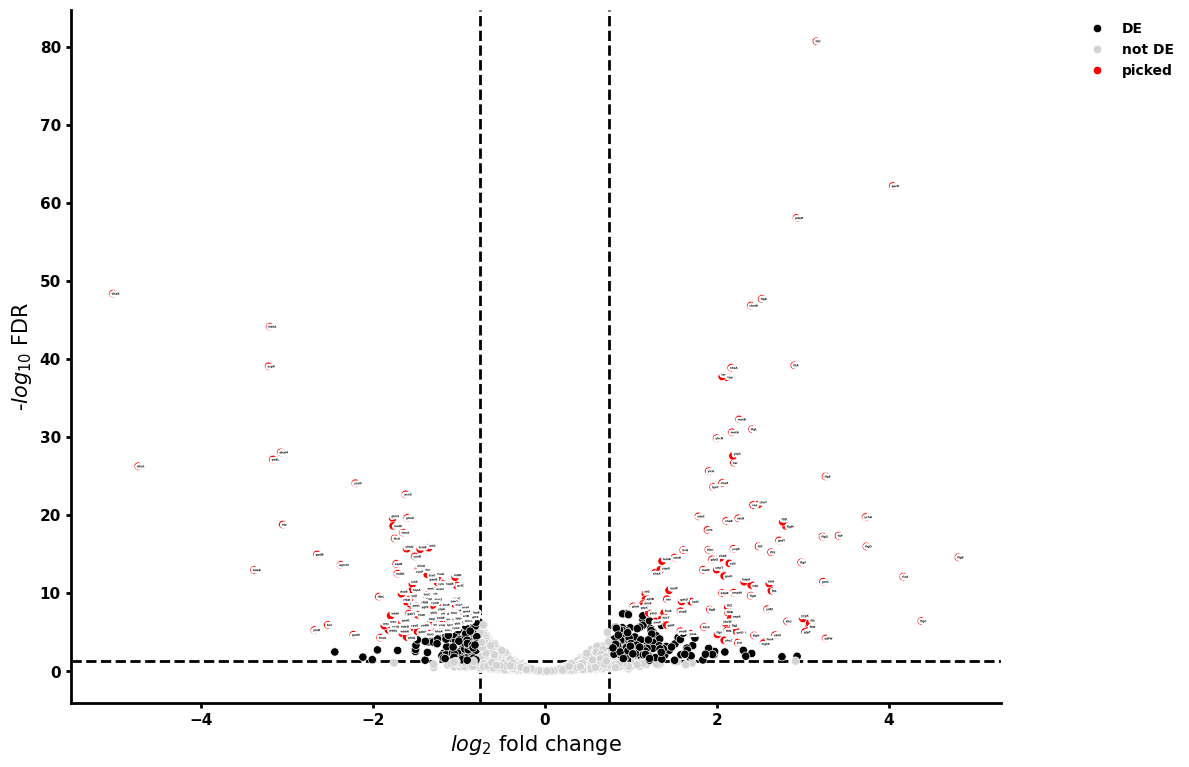

In [54]:
volcano(df_annot, symbol='gene', figsize = (12, 9), to_label = 100, fontsize = 2, colors=['black', 'lightgrey', 'red'], point_sizes= (1000),
        top_right_frame=False, legend_pos=(1.2, 1), save = 'bw_sspa_23092024')

In [312]:
from goatools.base import download_go_basic_obo
from goatools.base import download_ncbi_associations
from goatools.obo_parser import GODag
from goatools.anno.genetogo_reader import Gene2GoReader
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS

In [90]:
#run one time to initialize
obo_fname = download_go_basic_obo()
fin_gene2go = download_ncbi_associations()
obodag = GODag("go-basic.obo")

$ get http://purl.obolibrary.org/obo/go/go-basic.obo
requests.get(http://purl.obolibrary.org/obo/go/go-basic.obo, stream=True)
  WROTE: go-basic.obo

$ get ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz
FTP RETR ftp.ncbi.nlm.nih.gov gene/DATA gene2go.gz -> gene2go.gz
$ gunzip gene2go.gz
go-basic.obo: fmt(1.2) rel(2024-09-08) 44,296 Terms


In [313]:
ec_genez = pd.read_table('gene_result.txt', )

tax_id                                   Org_name    GeneID  CurrentID  \
0     511145  Escherichia coli str. K-12 substr. MG1655  63925640          0   
1     511145  Escherichia coli str. K-12 substr. MG1655   5625560          0   
2     511145  Escherichia coli str. K-12 substr. MG1655   7751645          0   
3     511145  Escherichia coli str. K-12 substr. MG1655    947748          0   
4     511145  Escherichia coli str. K-12 substr. MG1655    947747          0   
...      ...                                        ...       ...        ...   
4634  511145  Escherichia coli str. K-12 substr. MG1655    948505          0   
4635  511145  Escherichia coli str. K-12 substr. MG1655    948506          0   
4636  511145  Escherichia coli str. K-12 substr. MG1655    947035          0   
4637  511145  Escherichia coli str. K-12 substr. MG1655    948552          0   
4638  511145  Escherichia coli str. K-12 substr. MG1655    946370          0   

     Status      Symbol                     Aliases  \
0      live  3'ETS-leuZ              b4759, ECK4616   
1      live        aaaD        b4634, ECK4439, ylcF   
2      live        aaaE              b4693, ECK1135   
3      live        aaeA        b3241, ECK3230, yhcQ   
4      live        aaeB        b3240, ECK3229, yhcP   
...     ...         ...                         ...   
4634   live        zraR        b4004, ECK3996, hydG   
4635   live        zraS        b4003, ECK3995, hydH   
4636   live        zupT        b3040, ECK3031, ygiE   
4637   live         zur  b4046, ECK4038, yjbK, znuR   
4638   live         zwf              b1852, ECK1853   

                                            description  \
0                                                 ncRNA   
1                                                pseudo   
2                                                pseudo   
3     aromatic carboxylic acid efflux pump membrane ...   
4     aromatic carboxylic acid efflux pump subunit AaeB   
...                                                 ...   
4634         DNA-binding transcriptional activator ZraR   
4635                       sensor histidine kinase ZraS   
4636                divalent metal ion transporter ZupT   
4637          DNA-binding transcriptional repressor Zur   
4638  NADP(+)-dependent glucose-6-phosphate dehydrog...   

                                     other_designations  map_location  \
0                                                   NaN           NaN   
1                                                   NaN           NaN   
2                                                   NaN           NaN   
3     aromatic carboxylic acid efflux pump membrane ...           NaN   
4     aromatic carboxylic acid efflux pump subunit AaeB           NaN   
...                                                 ...           ...   
4634         DNA-binding transcriptional activator ZraR           NaN   
4635                       sensor histidine kinase ZraS           NaN   
4636                divalent metal ion transporter ZupT           NaN   
4637          DNA-binding transcriptional repressor Zur           NaN   
4638  NADP(+)-dependent glucose-6-phosphate dehydrog...           NaN   

      chromosome genomic_nucleotide_accession.version  \
0            NaN                          NC_000913.3   
1            NaN                          NC_000913.3   
2            NaN                          NC_000913.3   
3            NaN                          NC_000913.3   
4            NaN                          NC_000913.3   
...          ...                                  ...   
4634         NaN                          NC_000913.3   
4635         NaN                          NC_000913.3   
4636         NaN                          NC_000913.3   
4637         NaN                          NC_000913.3   
4638         NaN                          NC_000913.3   

      start_position_on_the_genomic_accession  \
0                                     1991748   
1              

GeneID      Symbol                     Aliases
0     63925640  3'ETS-leuZ              b4759, ECK4616
1      5625560        aaaD        b4634, ECK4439, ylcF
2      7751645        aaaE              b4693, ECK1135
3       947748        aaeA        b3241, ECK3230, yhcQ
4       947747        aaeB        b3240, ECK3229, yhcP
...        ...         ...                         ...
4634    948505        zraR        b4004, ECK3996, hydG
4635    948506        zraS        b4003, ECK3995, hydH
4636    947035        zupT        b3040, ECK3031, ygiE
4637    948552         zur  b4046, ECK4038, yjbK, znuR
4638    946370         zwf              b1852, ECK1853

[4639 rows x 3 columns]

In [315]:
#run one time to initialize
mapper = dict(zip(ec_genez['Symbol'], ec_genez['GeneID']))

for key in GeneID2nt_mus:
    mapper[GeneID2nt_mus[key].Symbol] = GeneID2nt_mus[key].GeneID
    
inv_map = {v: k for k, v in mapper.items()}

In [92]:
#run one time to initialize

# Read NCBI's gene2go. Store annotations in a list of namedtuples
objanno = Gene2GoReader(fin_gene2go, taxids=[511145])
# Get namespace2association where:
#    namespace is:
#        BP: biological_process               
#        MF: molecular_function
#        CC: cellular_component
#    assocation is a dict:
#        key: NCBI GeneID
#        value: A set of GO IDs associated with that gene
ns2assoc = objanno.get_ns2assc()

HMS:0:01:37.821119  41,224 annotations,  3,849 genes,  4,117 GOs, 1 taxids READ: gene2go 


In [316]:
#run one time to initialize
goeaobj = GOEnrichmentStudyNS(
        inv_map.keys(),
        ns2assoc, # geneid/GO associations
        obodag, # Ontologies
        propagate_counts = False,
        alpha = 0.05, # default significance cut-off
        methods = ['fdr_bh']) # defult multipletest correction method


Load BP Ontology Enrichment Analysis ...
 10%  3,298 of 32,848 population items found in association

Load CC Ontology Enrichment Analysis ...
  9%  3,002 of 32,848 population items found in association

Load MF Ontology Enrichment Analysis ...
 10%  3,243 of 32,848 population items found in association


In [317]:
#run one time to initialize
GO_items = []

temp = goeaobj.ns2objgoea['BP'].assoc
for item in temp:
    GO_items += temp[item]
    

temp = goeaobj.ns2objgoea['CC'].assoc
for item in temp:
    GO_items += temp[item]
    

temp = goeaobj.ns2objgoea['MF'].assoc
for item in temp:
    GO_items += temp[item]

In [318]:
#pass list of gene symbols
def go_it(test_genes):
    print(f'input genes: {len(test_genes)}')
    
    mapped_genes = []
    for gene in test_genes:
        try:
            mapped_genes.append(mapper[gene])
        except:
            pass
    print(f'mapped genes: {len(mapped_genes)}')
    
    goea_results_all = goeaobj.run_study(mapped_genes)
    goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]
    GO = pd.DataFrame(list(map(lambda x: [x.GO, x.goterm.name, x.goterm.namespace, x.p_uncorrected, x.p_fdr_bh,\
                   x.ratio_in_study[0], x.ratio_in_study[1], GO_items.count(x.GO), list(map(lambda y: inv_map[y], x.study_items)),\
                   ], goea_results_sig)), columns = ['GO', 'term', 'class', 'p', 'p_corr', 'n_genes',\
                                                    'n_study', 'n_go', 'study_genes'])

    GO = GO[GO.n_genes > 1]
    return GO

In [323]:
df_annot[df_annot['padj']<0.05].gene.values

array(['thrC', 'yaaA', 'yaaJ', 'nhaR', 'ribF', 'ileS', 'lspA', 'fkpB',
       'ispH', 'rihC', 'carA', 'carB', 'folA', 'apaH', 'surA', 'lptD',
       'djlA', 'rluA', 'rapA', 'thiQ', 'thiP', 'thiB', 'cra', 'ftsL',
       'ftsI', 'murE', 'murF', 'mraY', 'guaC', 'nadC', 'ampD', 'aceE',
       'aceF', 'lpdA', 'acnB', 'gcd', 'yadE', 'panD', 'panC', 'panB',
       'sfsA', 'yadS', 'frr', 'ispU', 'cdsA', 'bamA', 'skp', 'lpxD',
       'lpxB', 'rnhB', 'dnaE', 'accA', 'tilS', 'yaeP', 'nlpE', 'proS',
       'tsaA', 'yafD', 'mltD', 'dpaA', 'pepD', 'gpt', 'crl', 'yafW',
       'ykfF', '', 'mmuM', '', 'ykgE', 'betA', 'betB', 'betT', 'pdeL',
       'yahK', 'yahO', 'hemB', 'yaiZ', 'yaiI', 'sbcC', 'sbcD', 'phoR',
       'brnQ', 'queA', 'tgt', 'tsx', 'nrdR', 'ribD', 'dxs', 'ispA',
       'xseB', 'yajR', 'cyoE', 'cyoD', 'cyoC', 'cyoB', 'cyoA', 'ampG',
       'clpP', 'decR', 'mdlA', 'amtB', 'mscK', 'adk', 'ybaL', 'copA',
       'glsA', 'ybaT', 'qmcA', 'ybbA', 'ppiB', 'folD', 'rzoD', 'bor',
       'ybcW', 'y

In [324]:
df = go_it(df_annot[df_annot['padj']<0.05].gene.values)

input genes: 991
mapped genes: 934

Runing BP Ontology Analysis: current study set of 934 IDs.
 83%    775 of    932 study items found in association
100%    932 of    934 study items found in population(32848)
Calculating 1,760 uncorrected p-values using fisher_scipy_stats
   1,760 terms are associated with  3,298 of 32,848 population items
     980 terms are associated with    775 of    932 study items
  METHOD fdr_bh:
     396 GO terms found significant (< 0.05=alpha) (396 enriched +   0 purified): statsmodels fdr_bh
     732 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Runing CC Ontology Analysis: current study set of 934 IDs.
 82%    762 of    932 study items found in association
100%    932 of    934 study items found in population(32848)
Calculating 261 uncorrected p-values using fisher_scipy_stats
     261 terms are associated with  3,002 of 32,848 population items
     152 terms are associated wit

In [326]:
df['per'] = df.n_genes/df.n_go

In [328]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
import textwrap

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 10 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'four', 'nonmarkingreturn', 'one', 'period', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 10 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'four', 'nonmarkingreturn', 'one', 'period', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23]
INFO:fontTools.subset:Closing glyph list over 'MATH': 10 glyphs before
INFO

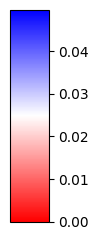

In [329]:
fig, ax = plt.subplots(figsize = (0.5, 2.75))

to_plot = 20

cmap = mpl.cm.bwr_r
norm = mpl.colors.Normalize(vmin = df.p_corr.min(), vmax = df.p_corr.max())
mapper = cm.ScalarMappable(norm = norm, cmap = cm.bwr_r)
cbl = mpl.colorbar.ColorbarBase(ax, cmap = cmap, norm = norm, orientation = 'vertical')
plt.savefig('WT_sspA_GO_heatmap_corrpval.pdf', format = 'pdf', dpi=fig.dpi)#, layout = 'tight')

/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_8913/3482338411.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(data = df.sort_values(by= 'p_corr', ascending = True), x = 'per', y = 'term', palette = mapper.to_rgba(df.p_corr.values))
/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_8913/3482338411.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([textwrap.fill(e, 100) for e in df['term']])


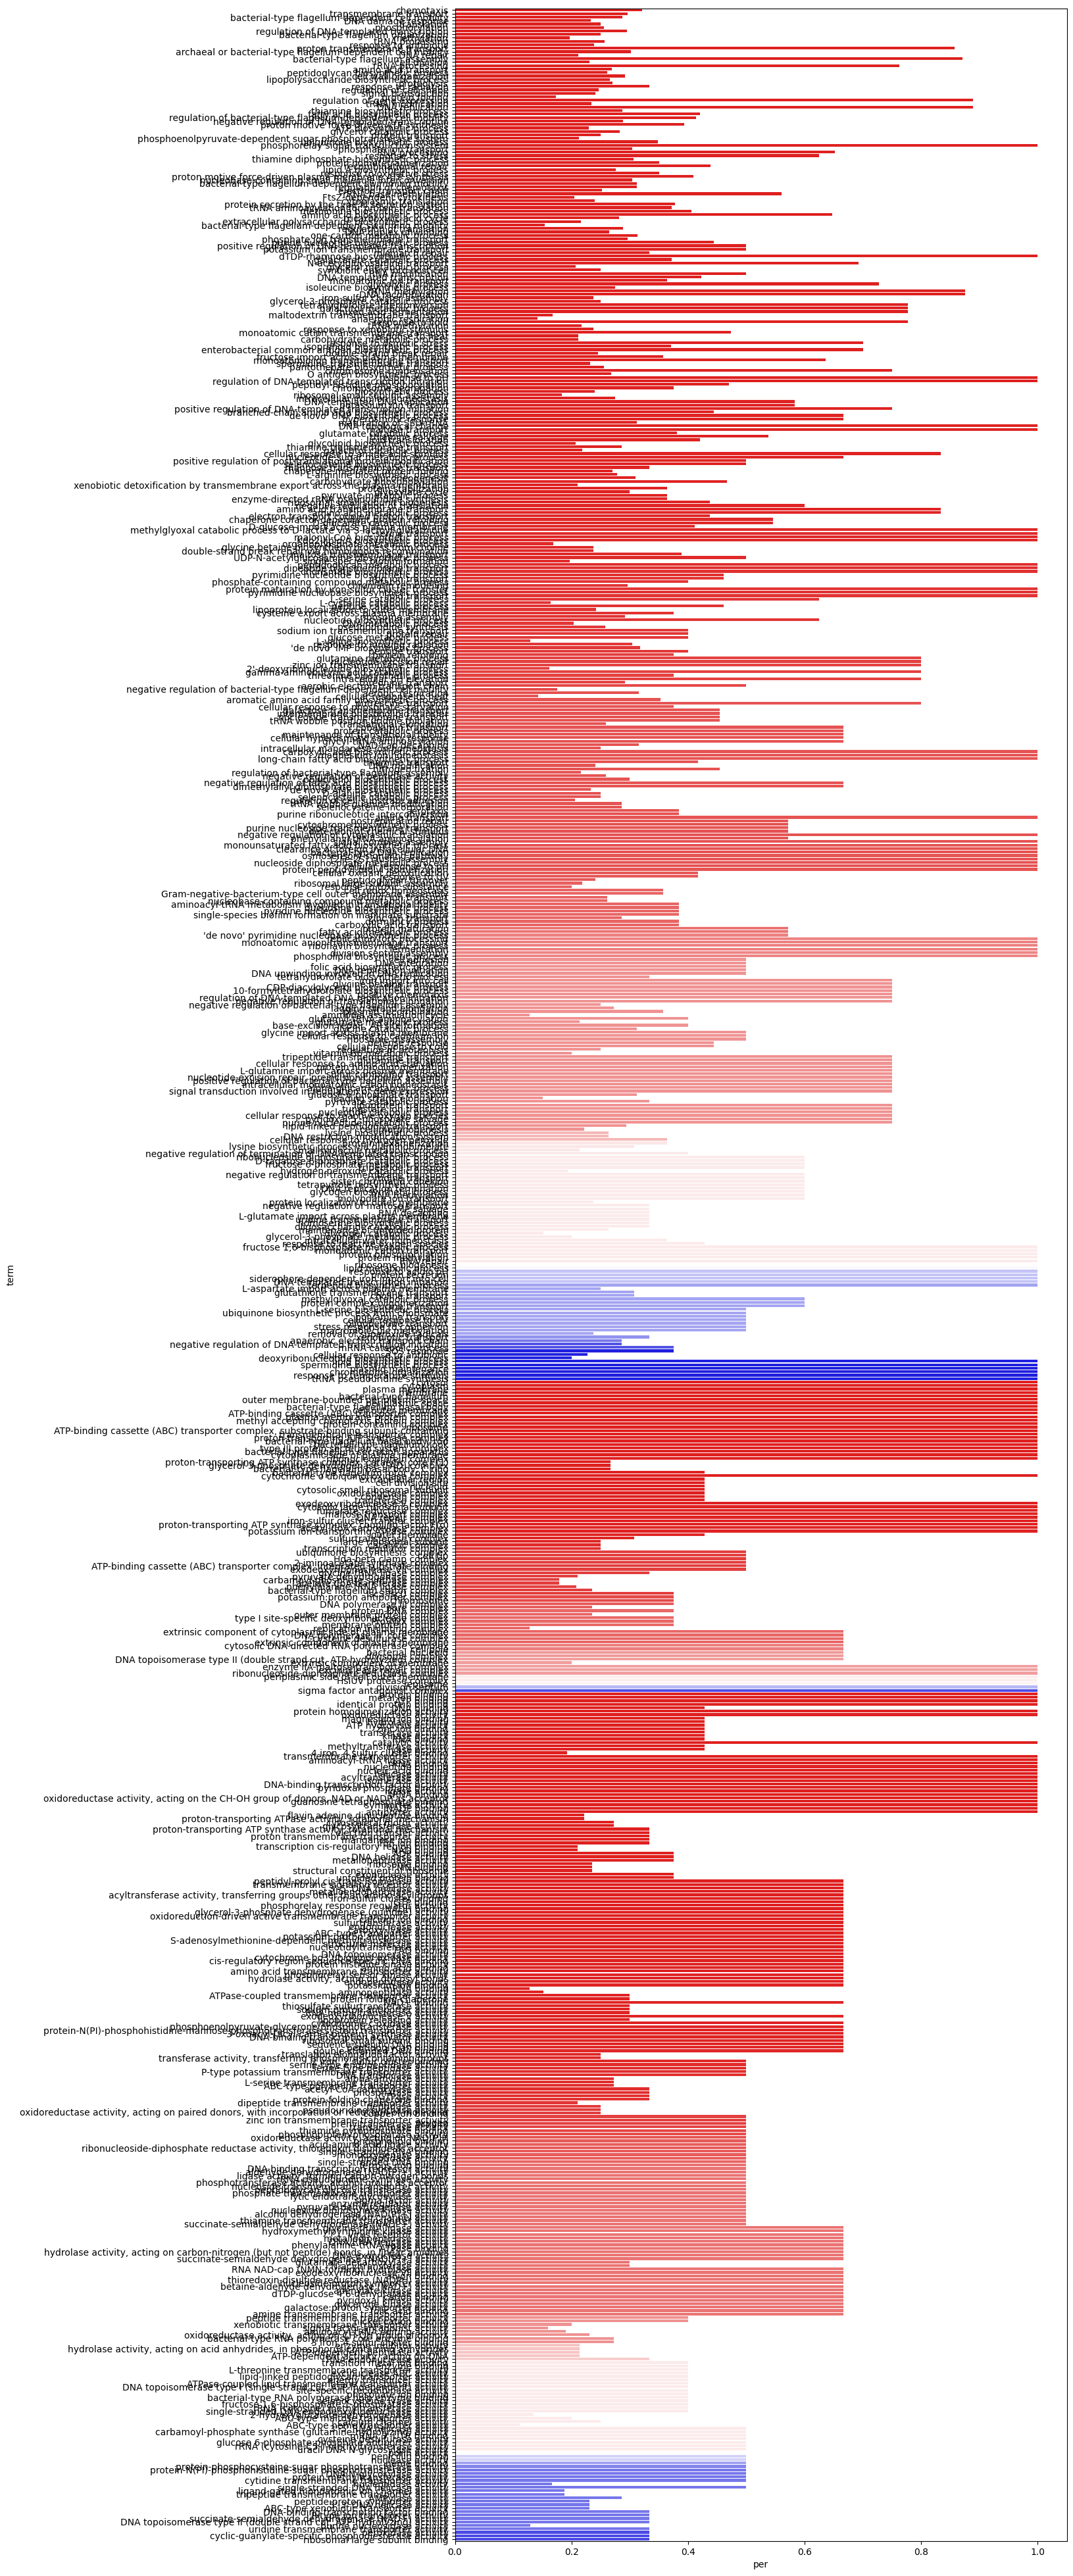

In [355]:
plt.figure(figsize = (12,50))
ax = sns.barplot(data = df.sort_values(by= 'p_corr', ascending = True), x = 'per', y = 'term', palette = mapper.to_rgba(df.p_corr.values))
ax.set_yticklabels([textwrap.fill(e, 100) for e in df['term']])
plt.show()

/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_8913/3772935316.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(data = df[:to_plot].sort_values(by= 'p_corr', ascending = True), x = 'n_genes', y = 'term', palette = mapper.to_rgba(df[:to_plot].p_corr.values))
/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_8913/3772935316.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([textwrap.fill(e, 100) for e in df[:to_plot]['term']])


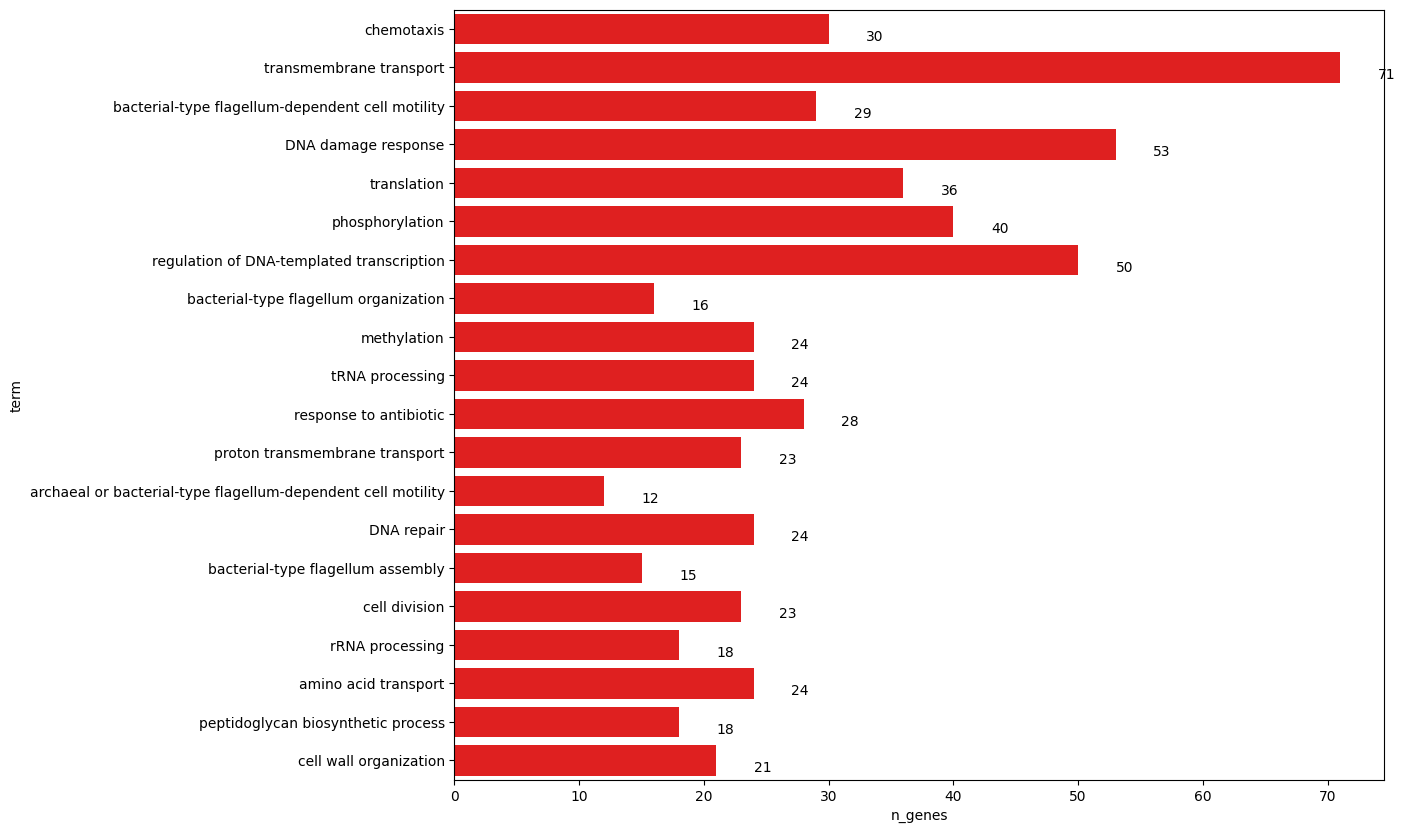

In [332]:
plt.figure(figsize = (12,10))

ax = sns.barplot(data = df[:to_plot].sort_values(by= 'p_corr', ascending = True), x = 'n_genes', y = 'term', palette = mapper.to_rgba(df[:to_plot].p_corr.values))

ax.set_yticklabels([textwrap.fill(e, 100) for e in df[:to_plot]['term']])

for p in ax.patches:
    #print (p)
    #print (p.get_xy())
    ax.annotate(
        str(int(p.get_width())), xy=(p.get_width() + 3, p.get_xy()[1] + 0.7), fontsize=10
    )

plt.show()


In [333]:
df[df['class']=='biological_process']

GO                                               term  \
0    GO:0006935                                         chemotaxis   
1    GO:0055085                            transmembrane transport   
2    GO:0071973   bacterial-type flagellum-dependent cell motility   
3    GO:0006974                                DNA damage response   
4    GO:0006412                                        translation   
5    GO:0016310                                    phosphorylation   
6    GO:0006355          regulation of DNA-templated transcription   
7    GO:0044781              bacterial-type flagellum organization   
8    GO:0032259                                        methylation   
9    GO:0008033                                    tRNA processing   
10   GO:0046677                             response to antibiotic   
11   GO:1902600                     proton transmembrane transport   
12   GO:0097588  archaeal or bacterial-type flagellum-dependent...   
13   GO:0006281                                         DNA repair   
14   GO:0044780                  bacterial-type flagellum assembly   
15   GO:0051301                                      cell division   
16   GO:0006364                                    rRNA processing   
17   GO:0006865                               amino acid transport   
18   GO:0009252                 peptidoglycan biosynthetic process   
19   GO:0071555                             cell wall organization   
20   GO:0009103            lipopolysaccharide biosynthetic process   
21   GO:0006508                                        proteolysis   
22   GO:0009314                              response to radiation   
23   GO:0008360                           regulation of cell shape   
24   GO:0007165                                signal transduction   
25   GO:0006457                                    protein folding   
26   GO:0010468                      regulation of gene expression   
27   GO:0006400                                  tRNA modification   
28   GO:0006260                                    DNA replication   
29   GO:0009228                      thiamine biosynthetic process   
30   GO:0006633                    fatty acid biosynthetic process   
31   GO:1902021  regulation of bacterial-type flagellum-depende...   
32   GO:0045892  negative regulation of DNA-templated transcrip...   
33   GO:0015986           proton motive force-driven ATP synthesis   
34   GO:0006754                           ATP biosynthetic process   
35   GO:0019563                         glycerol catabolic process   
36   GO:0015031                                  protein transport   
37   GO:0009401  phosphoenolpyruvate-dependent sugar phosphotra...   
38   GO:0006744                    ubiquinone biosynthetic process   
39   GO:0000160            phosphorelay signal transduction system   
40   GO:0006817                            phosphate ion transport   
41   GO:0006396                                     RNA processing   
42   GO:0006950                                 response to stress   
43   GO:0009229          thiamine diphosphate biosynthetic process   
44   GO:0051289                        protein homotetramerization   
45   GO:0000725                             recombinational repair   
46   GO:0009245                       lipid A biosynthetic process   
47   GO:0006979                       response to oxidative stress   
48   GO:0042777  proton motive force-driven plasma membrane ATP...   
49   GO:0015949  nucleobase-containing small molecule interconv...   
50   GO:0071977  bacterial-type flagellum-dependent swimming mo...   
51   GO:0050920                           regulation of chemotaxis   
52   GO:0022900                           electron transport chain   
53   GO:0070475                              rRNA base methylation   
54   GO:0043093                         FtsZ-dependent cytokinesis   
55   GO:0002181                            cytoplasmic translation   
56   GO:0030254  protei

In [334]:
df[df['class']=='molecular_function']

GO                                               term  \
486  GO:0005515                                    protein binding   
487  GO:0046872                                  metal ion binding   
488  GO:0005524                                        ATP binding   
489  GO:0042802                          identical protein binding   
490  GO:0003677                                        DNA binding   
491  GO:0042803                  protein homodimerization activity   
492  GO:0016491                            oxidoreductase activity   
493  GO:0000287                              magnesium ion binding   
494  GO:0016787                                 hydrolase activity   
495  GO:0016887                            ATP hydrolysis activity   
496  GO:0008270                                   zinc ion binding   
497  GO:0016740                               transferase activity   
498  GO:0016301                                    kinase activity   
499  GO:0003723                                        RNA binding   
500  GO:0003824                                 catalytic activity   
501  GO:0008168                         methyltransferase activity   
502  GO:0016829                                     lyase activity   
503  GO:0051539                   4 iron, 4 sulfur cluster binding   
504  GO:0022857                 transmembrane transporter activity   
505  GO:0004812                     aminoacyl-tRNA ligase activity   
506  GO:0019843                                       rRNA binding   
507  GO:0000166                                 nucleotide binding   
508  GO:0003676                               nucleic acid binding   
509  GO:0004386                                  helicase activity   
510  GO:0016746                           acyltransferase activity   
511  GO:0016853                                 isomerase activity   
512  GO:0003700          DNA-binding transcription factor activity   
513  GO:0030170                        pyridoxal phosphate binding   
514  GO:0016874                                    ligase activity   
515  GO:0000049                                       tRNA binding   
516  GO:0016616  oxidoreductase activity, acting on the CH-OH g...   
517  GO:0097216                   guanosine tetraphosphate binding   
518  GO:0015293                                 symporter activity   
519  GO:0050661                                       NADP binding   
520  GO:0015297                                antiporter activity   
521  GO:0050660                flavin adenine dinucleotide binding   
522  GO:0046961  proton-transporting ATPase activity, rotationa...   
523  GO:0003774                        cytoskeletal motor activity   
524  GO:0016757                       glycosyltransferase activity   
525  GO:0046933  proton-transporting ATP synthase activity, rot...   
526  GO:0009055                         electron transfer activity   
527  GO:0015078          proton transmembrane transporter activity   
528  GO:0030145                              manganese ion binding   
529  GO:0005506                                   iron ion binding   
530  GO:0000976        transcription cis-regulatory region binding   
531  GO:0051287                                        NAD binding   
532  GO:0043531                                        ADP binding   
533  GO:0003678                              DNA helicase activity   
534  GO:0008237                          metallopeptidase activity   
535  GO:0043022                                   ribosome binding   
536  GO:0010181                                        FMN binding   
537  GO:0003735                 structural constituent of ribosome   
538  GO:0004527                               exonuclease activity   
539  GO:0051082                           unfolded protein binding   
540  GO:0003755       peptidyl-prolyl cis-trans isomerase activity   
541  GO:0004888          transmembrane signaling receptor activity   
542  GO:0043138        

In [336]:
df[df['class']=='cellular_component']

GO                                               term  \
396  GO:0005829                                            cytosol   
397  GO:0005737                                          cytoplasm   
398  GO:0005886                                    plasma membrane   
399  GO:0016020                                           membrane   
400  GO:0009288                           bacterial-type flagellum   
401  GO:0030288           outer membrane-bounded periplasmic space   
402  GO:0042597                                  periplasmic space   
403  GO:0009425                bacterial-type flagellum basal body   
404  GO:0009279                                cell outer membrane   
405  GO:0043190     ATP-binding cassette (ABC) transporter complex   
406  GO:0098797                    plasma membrane protein complex   
407  GO:0098561        methyl accepting chemotaxis protein complex   
408  GO:0032991                         protein-containing complex   
409  GO:0005840                                           ribosome   
410  GO:0055052  ATP-binding cassette (ABC) transporter complex...   
411  GO:1902495                  transmembrane transporter complex   
412  GO:0045259           proton-transporting ATP synthase complex   
413  GO:0030694           bacterial-type flagellum basal body, rod   
414  GO:0009424                      bacterial-type flagellum hook   
415  GO:0030257          type III protein secretion system complex   
416  GO:0120102       bacterial-type flagellum secretion apparatus   
417  GO:0009898                cytoplasmic side of plasma membrane   
418  GO:1990904                          ribonucleoprotein complex   
419  GO:0045261  proton-transporting ATP synthase complex, cata...   
420  GO:0009331   glycerol-3-phosphate dehydrogenase (FAD) complex   
421  GO:0009433        bacterial-type flagellum basal body, C ring   
422  GO:0120107             bacterial-type flagellum rotor complex   
423  GO:0009319             cytochrome o ubiquinol oxidase complex   
424  GO:0005576                               extracellular region   
425  GO:0032153                                 cell division site   
426  GO:0009295                                           nucleoid   
427  GO:0022627                  cytosolic small ribosomal subunit   
428  GO:1990204                             oxidoreductase complex   
429  GO:0000796                                  condensin complex   
430  GO:1990234                                transferase complex   
431  GO:0009338                     exodeoxyribonuclease V complex   
432  GO:0022625                  cytosolic large ribosomal subunit   
433  GO:0045283                         fumarate reductase complex   
434  GO:1990060                          maltose transport complex   
435  GO:1990391                                 DNA repair complex   
436  GO:1990230               iron-sulfur cluster transfer complex   
437  GO:0045263  proton-transporting ATP synthase complex, coup...   
438  GO:0009317                     acetyl-CoA carboxylase complex   
439  GO:0031004          potassium ion-transporting ATPase complex   
440  GO:0019867                                     outer membrane   
441  GO:1990228                          sulfurtransferase complex   
442  GO:0015934                            large ribosomal subunit   
443  GO:1902494                                  catalytic complex   
444  GO:0005667                    transcription regulator complex   
445  GO:0110142                    ubiquinone biosynthesis complex   
446  GO:0051286                                           cell tip   
447  GO:1990085                             Hda-beta clamp complex   
448  GO:1902508                    2-iminoacetate synthase complex   
449  GO:0055051  ATP-binding cassette (ABC) transporter complex...   
450  GO:0009318                   exodeoxyribonuclease VII complex   
451  GO:0009345                        glycine-tRNA ligase complex   
452  GO:0045254        

/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_8913/2904495474.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(data = df[df['class']=='biological_process'][:to_plot].sort_values(by= ['n_genes', 'p_corr'], ascending = False),
/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_8913/2904495474.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([textwrap.fill(e, 100) for e in df[df['class']=='biological_process'][:to_plot]['term']])
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fon

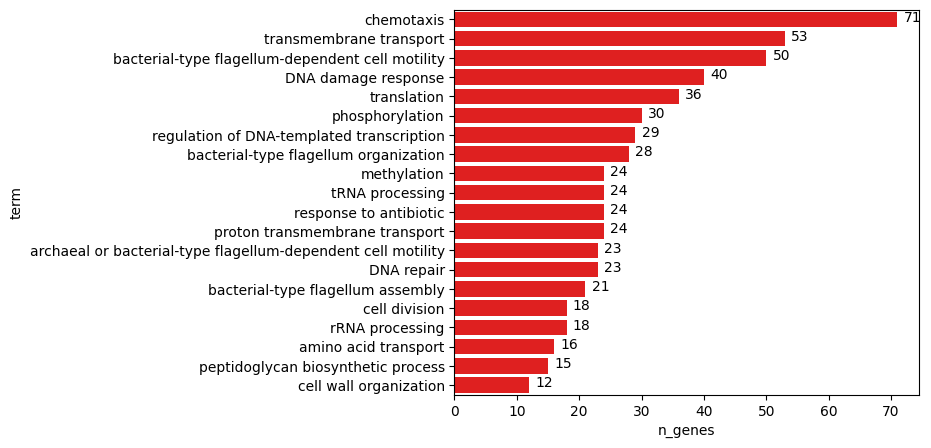

In [348]:
plt.figure(figsize = (6,5))

ax = sns.barplot(data = df[df['class']=='biological_process'][:to_plot].sort_values(by= ['n_genes', 'p_corr'], ascending = False), 
                 x = 'n_genes', y = 'term', palette = mapper.to_rgba(df[df['class']=='biological_process'][:to_plot].p_corr.values))

ax.set_yticklabels([textwrap.fill(e, 100) for e in df[df['class']=='biological_process'][:to_plot]['term']])

for p in ax.patches:
    ax.annotate(
        str(int(p.get_width())), xy=(p.get_width() + 1, p.get_xy()[1] + 0.5), fontsize=10
    )

plt.savefig('WT_sspA_GO_bioprocess.pdf', format = 'pdf', dpi=fig.dpi)#, layout = 'tight')

/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_8913/3160131238.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(data = df[df['class']=='molecular_function'][:to_plot].sort_values(by= ['n_genes', 'p_corr', ], ascending = False),
/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_8913/3160131238.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([textwrap.fill(e, 100) for e in df[df['class']=='molecular_function'][:to_plot]['term']])
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:f

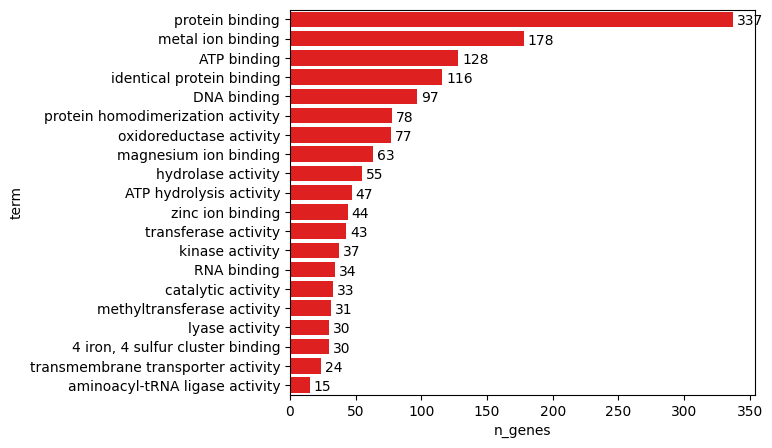

In [349]:
plt.figure(figsize = (6,5))

ax = sns.barplot(data = df[df['class']=='molecular_function'][:to_plot].sort_values(by= ['n_genes', 'p_corr', ], ascending = False), 
                 x = 'n_genes', y = 'term', palette = mapper.to_rgba(df[df['class']=='molecular_function'][:to_plot].p_corr.values))

ax.set_yticklabels([textwrap.fill(e, 100) for e in df[df['class']=='molecular_function'][:to_plot]['term']])

for p in ax.patches:
    ax.annotate(
        str(int(p.get_width())), xy=(p.get_width() + 3, p.get_xy()[1] + 0.7), fontsize=10
    )

plt.savefig('WT_sspA_GO_molecular_function.pdf', format = 'pdf', dpi=fig.dpi)#, layout = 'tight')

/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_8913/4087158959.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(data = df[df['class']=='cellular_component'][:to_plot].sort_values(by= [ 'n_genes', 'p_corr',], ascending = False),
/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_8913/4087158959.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([textwrap.fill(e, 100) for e in df[df['class']=='cellular_component'][:to_plot]['term']])
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:f

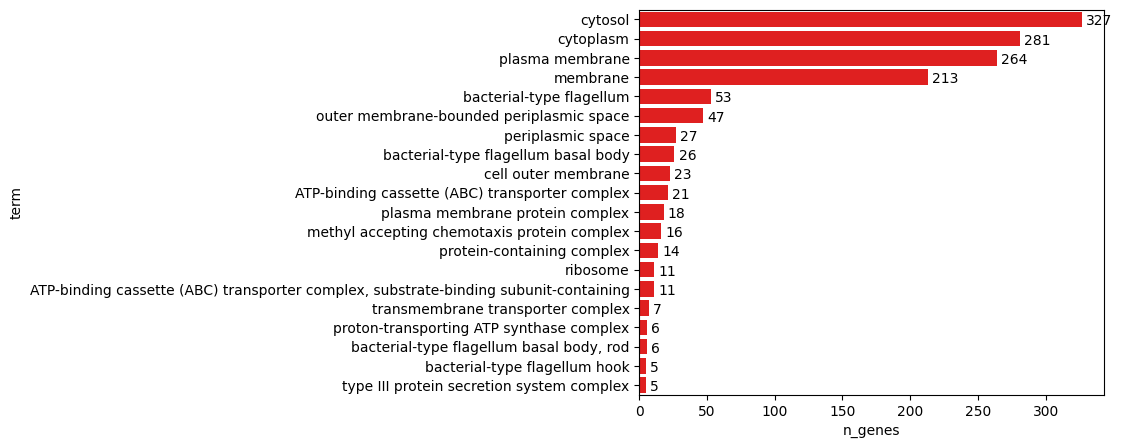

In [351]:
plt.figure(figsize = (6,5))

ax = sns.barplot(data = df[df['class']=='cellular_component'][:to_plot].sort_values(by= [ 'n_genes', 'p_corr',], ascending = False), 
                 x = 'n_genes', y = 'term', palette = mapper.to_rgba(df[df['class']=='cellular_component'][:to_plot].p_corr.values))

ax.set_yticklabels([textwrap.fill(e, 100) for e in df[df['class']=='cellular_component'][:to_plot]['term']])

for p in ax.patches:
    ax.annotate(
        str(int(p.get_width())), xy=(p.get_width() + 3, p.get_xy()[1] + 0.7), fontsize=10
    )

plt.savefig('WT_sspA_GO_cellular_component.pdf', format = 'pdf', dpi=fig.dpi)#, layout = 'tight')


In [370]:
df[df['term']=='regulation of DNA-templated transcription'].study_genes.values

array([list(['ydcI', 'rpoH', 'pdeL', 'ygbI', 'nagC', 'glnL', 'glnG', 'rpoS', 'fur', 'mfd', 'phoR', 'argR', 'zraR', 'melR', 'flhD', 'cra', 'yhaJ', 'yieP', 'rspR', 'rcnR', 'rapA', 'arcB', 'cpxR', 'gadX', 'rssB', 'putA', 'csiE', 'cytR', 'yciT', 'srlR', 'flhC', 'lrhA', 'ydcR', 'metR', 'soxS', 'fliA', 'relE', 'pspA', 'yeeY', 'ttdR', 'cusR', 'fabR', 'gntR', 'oxyR', 'sdiA', 'birA', 'nhaR', 'uvrY', 'fecA', 'iscR'])],
      dtype=object)

In [371]:
df[df['term']=='DNA damage response'].study_genes.values

array([list(['uvrC', 'nagE', 'pstS', 'thiH', 'pstA', 'mfd', 'lldP', 'hupA', 'gpr', 'treC', 'rfbC', 'ompC', 'rihC', 'idi', 'purB', 'ompA', 'deoC', 'malF', 'pfkB', 'betT', 'yjeI', 'malE', 'frdA', 'katE', 'ycfL', 'gadX', 'elaB', 'efeB', 'lamB', 'yggE', 'feoA', 'argF', 'yciT', 'flgI', 'yfbU', 'feoB', 'ydhQ', 'dhaK', 'dhaM', 'proQ', 'purA', 'solA', 'recD', 'mmuM', 'asd', 'glgB', 'gntR', 'pflA', 'oxyR', 'adhP', 'cpdB', 'dnaN', 'udp'])],
      dtype=object)

In [373]:
df[df['term']=='DNA repair'].study_genes.values

array([list(['uvrC', 'mfd', 'hupA', 'dinG', 'sbcD', 'uup', 'radA', 'hchA', 'nth', 'ogt', 'yrfG', 'ligA', 'sbcC', 'recB', 'recD', 'topB', 'recC', 'recO', 'mutH', 'mug', 'uvrB', 'mutY', 'radD', 'uvrD'])],
      dtype=object)

/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_8913/1916705086.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(data = df[df['class']=='biological_process'].sort_values(by= ['n_genes', 'p_corr'], ascending = False),
/var/folders/r1/g3bcq6hn03x0br8dy2l82yr40000gq/T/ipykernel_8913/1916705086.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([textwrap.fill(e, 100) for e in df[df['class']=='biological_process']['term']])
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closin

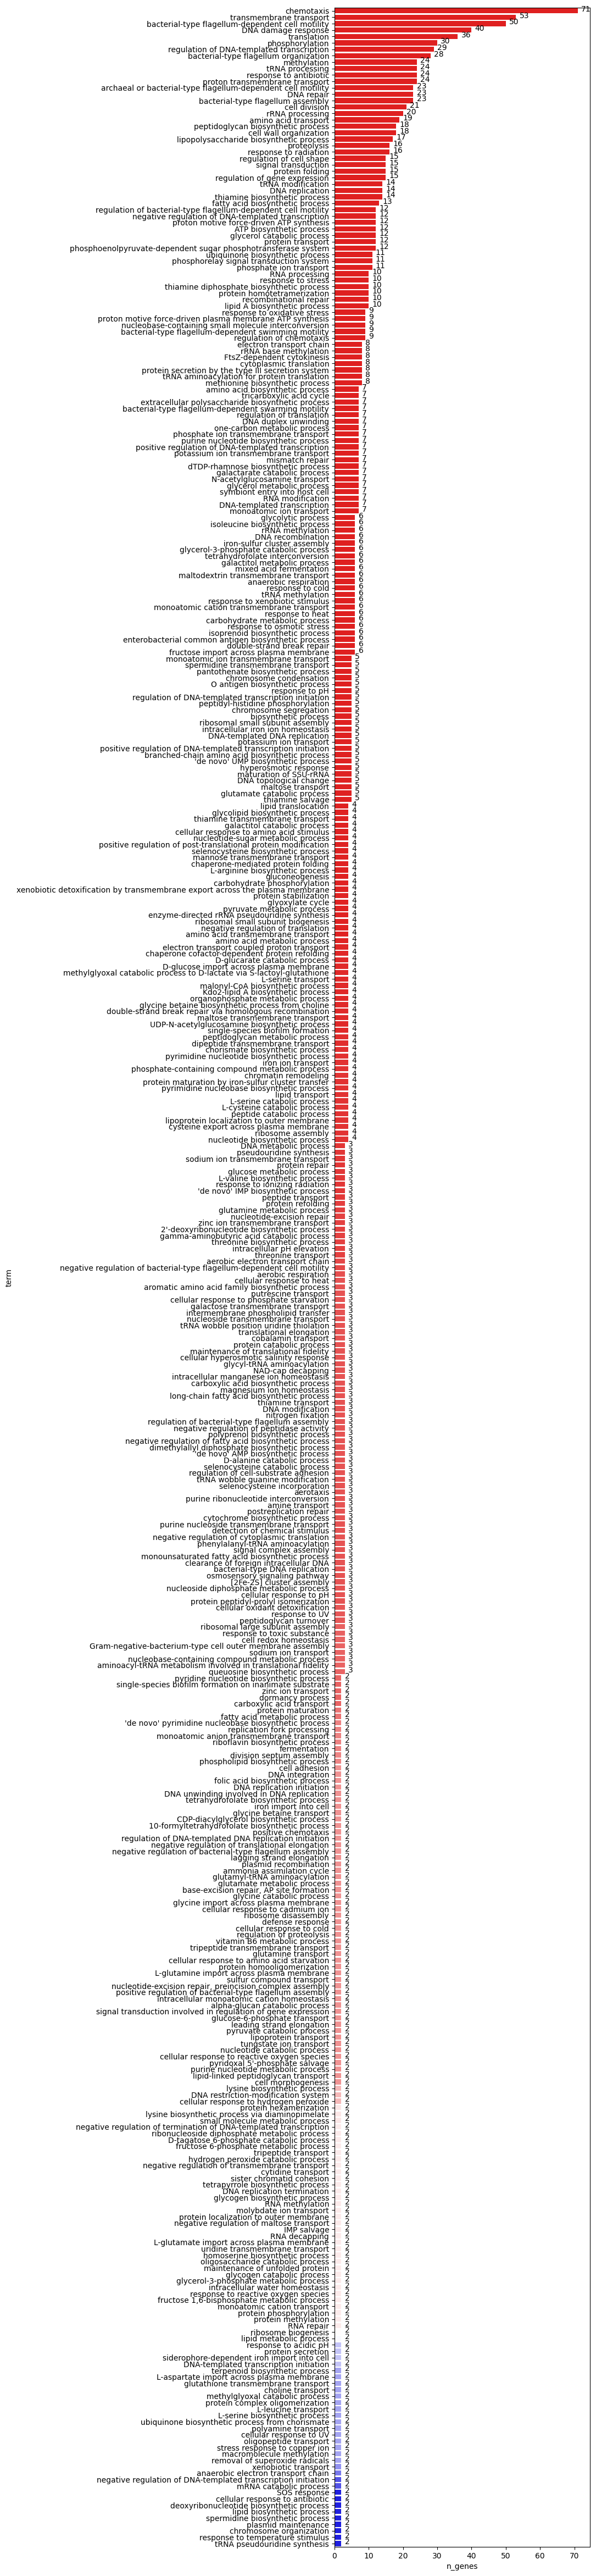

In [358]:
plt.figure(figsize = (6,60))

ax = sns.barplot(data = df[df['class']=='biological_process'].sort_values(by= ['n_genes', 'p_corr'], ascending = False), 
                 x = 'n_genes', y = 'term', palette = mapper.to_rgba(df[df['class']=='biological_process'].p_corr.values))

ax.set_yticklabels([textwrap.fill(e, 100) for e in df[df['class']=='biological_process']['term']])

for p in ax.patches:
    ax.annotate(
        str(int(p.get_width())), xy=(p.get_width() + 1, p.get_xy()[1] + 0.5), fontsize=10
    )

plt.savefig('WT_sspA_GO_all_bioprocess.pdf', format = 'pdf', dpi=fig.dpi)#, layout = 'tight')